In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [264]:
df = pd.read_json('D:\Source Code\Data_Analysis_Programming\Exercise_6\Data\modcloth_final_data.json', lines = True)

In [265]:
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

Ta Thấy Trong bộ dữ liệu chỉ có 6 cột có dữ liệu đầy đủ 

In [267]:
df.shape

(82790, 18)

Xem phần trắm giá trị bị thiếu trong từng cột

In [268]:
missing_data = pd.DataFrame({'total missing': df.isnull().sum(),'pre_missing':(df.isnull().sum()/82790)*100})

In [269]:
missing_data

,total missing,pre_missing
item_id,0,0.000000
waist,79908,96.518903
size,0,0.000000
quality,68,0.082136
cup size,6255,7.555260
hips,26726,32.281677
bra size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


Mô Tả Thống Kê Chung Của Data

In [270]:
df.describe()

,item_id,waist,size,quality,hips,bra size,user_id,shoe size
count,82790.000000,2882.000000,82790.000000,82722.000000,56064.000000,76772.000000,82790.000000,27915.000000
mean,469325.229170,31.319223,12.661602,3.949058,40.358501,35.972125,498849.564718,8.145818
std,213999.803314,5.302849,8.271952,0.992783,5.827166,3.224907,286356.969459,1.336109
min,123373.000000,20.000000,0.000000,1.000000,30.000000,28.000000,6.000000,5.000000
25%,314980.000000,28.000000,8.000000,3.000000,36.000000,34.000000,252897.750000,7.000000
50%,454030.000000,30.000000,12.000000,4.000000,39.000000,36.000000,497913.500000,8.000000
75%,658440.000000,34.000000,15.000000,5.000000,43.000000,38.000000,744745.250000,9.000000
max,807722.000000,50.000000,38.000000,5.000000,60.000000,48.000000,999972.000000,38.000000


* Ta Thấy bra size, hips không nhất thiếu thiểu kiểu dữ liệu Float
* Trong columns shoe size thì ta thấy values nó nằm trong khoảng 5-9 nhưng lại có size 38 thì nó mang giá trị ngoại lai hay đã nhâp nhầm size giày UK

## Xử lý giá trị ngoại lai

VISUALIZE

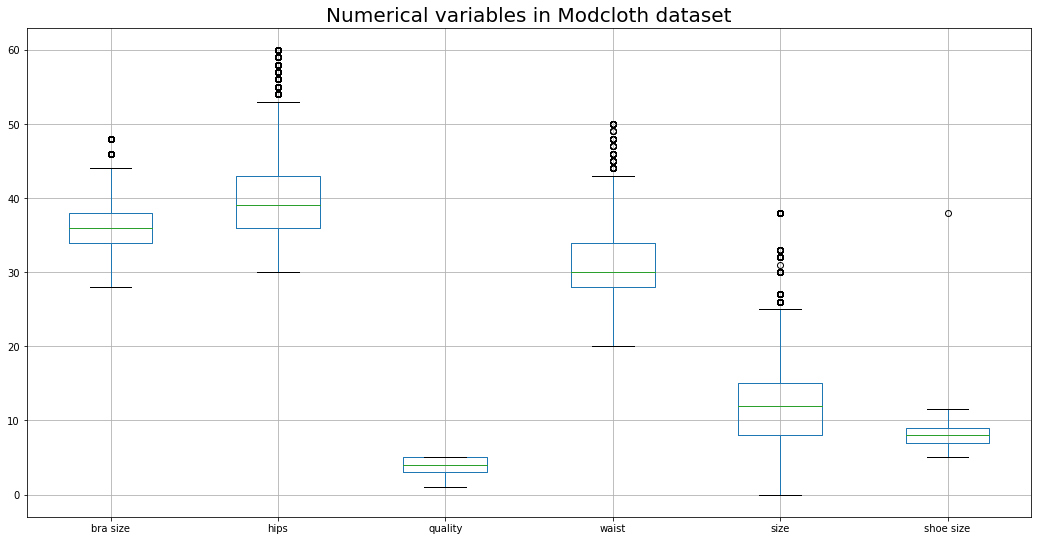

In [271]:

nums_col = ['bra size','hips','quality','waist','size','shoe size']
plt.figure(figsize=(18,9))
df[nums_col].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize = 20)
plt.show()

HANDLING OUTLIER (XỬ LÝ GIÁ TRỊ NGOẠI LAI)

C:\Users\DANG QUOC TOAN\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


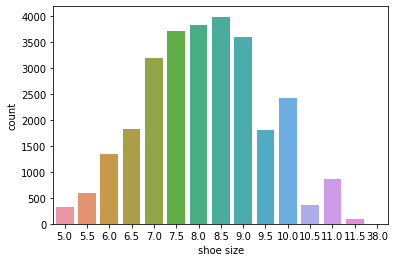

In [272]:
sns.countplot(df['shoe size'])
plt.show()

In [273]:
df[df['shoe size'] == 38].count()['shoe size']

1

In [274]:
#delete 
df[df['shoe size'] == 38]

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [275]:
df.at[37313,'shoe size'] = None

In [276]:
df.iloc[37313]

item_id                                                      416942
waist                                                          35.0
size                                                             12
quality                                                         5.0
cup size                                                          d
hips                                                           46.0
bra size                                                       36.0
category                                                        new
bust                                                          37-39
height                                                      5ft 5in
user_name                                                Catslittle
length                                                   just right
fit                                                             fit
user_id                                                      237498
shoe size                                       

In [277]:
df.sort_values(by = ['bra size'], ascending = False).head(10)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
73118,753429,NaN,38,3.0,dd/e,NaN,48.0,bottoms,NaN,5ft 4in,Mikki,slightly long,large,93792,NaN,NaN,I probably should have or,"I probably should have ordered a size down, bu..."
80713,796383,NaN,12,4.0,k,60.0,48.0,outerwear,NaN,7ft 11in,bandnerd2522,just right,small,810539,11.5,average,"This jacket is lovely, bu","This jacket is lovely, but I couldn't move my ..."
28901,401773,NaN,38,4.0,dd/e,58.0,48.0,new,NaN,5ft 7in,barretts4jesus,just right,fit,59963,NaN,NaN,Wonderful cardigan. I hav,Wonderful cardigan. I have the honey one as we...
71407,726492,NaN,15,3.0,k,60.0,48.0,bottoms,NaN,7ft 11in,bandnerd2522,slightly short,fit,708288,11.5,average,The pattern is just as lo,"The pattern is just as lovely in person, as in..."
38125,417269,NaN,38,3.0,d,35.0,48.0,new,NaN,5ft 9in,Susan,just right,large,308819,NaN,NaN,I wish I could have gotte,I wish I could have gotten the 3x but it's sti...
57273,645822,NaN,32,5.0,ddd/f,55.0,48.0,tops,NaN,5ft,Lillie,just right,fit,732268,NaN,NaN,I wear this almost every,I wear this almost every single day! Yay! Some...
14033,171125,NaN,38,3.0,c,NaN,48.0,dresses,NaN,5ft 8in,dillsyrpickle,just right,small,416697,NaN,NaN,So I really wanted to lov,So I really wanted to love this dress. I'm a ...
28845,401773,NaN,26,3.0,b,55.0,48.0,new,50,5ft 6in,Michelle,just right,fit,340392,9.5,wide,These cardigans are a gre,These cardigans are a great way to achieve tha...
22637,353933,NaN,38,5.0,b,NaN,48.0,dresses,NaN,5ft 2in,Meghan,slightly long,fit,175295,NaN,NaN,No negatives to this dres,"No negatives to this dress, it's absolutely go..."
38063,417269,NaN,38,4.0,c,NaN,48.0,new,NaN,5ft 6in,Bea,very long,fit,799178,NaN,NaN,"I love the fabric, I love","I love the fabric, I love long tops, this one ..."


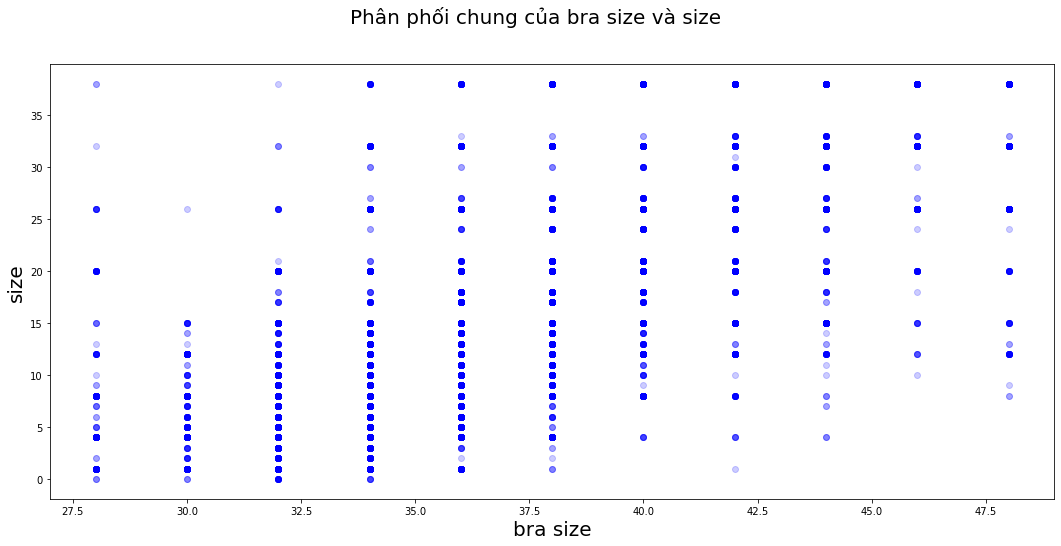

In [278]:
plt.figure(figsize=(18,8))
plt.xlabel("bra size", fontsize = 20)
plt.ylabel("size",fontsize = 20)
plt.suptitle("Phân phối chung của bra size và size", fontsize = 20)
plt.plot(df['bra size'],df['size'],'bo',alpha =0.2)
plt.show()

Chúng ta không thể thấy bất kỳ sự sai lệch đáng kể nào so với hành vi thông thường đối với cỡ áo ngực, sai lệch đối với tất cả các biến số khác - chúng ta có thể mong đợi các giá trị ngoại lệ 'rõ ràng', từ boxplot, cũng hoạt động tương tự. Bây giờ, chúng ta sẽ tiến hành xử lý trước tập dữ liệu để có những hình dung phù hợp

In [279]:
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


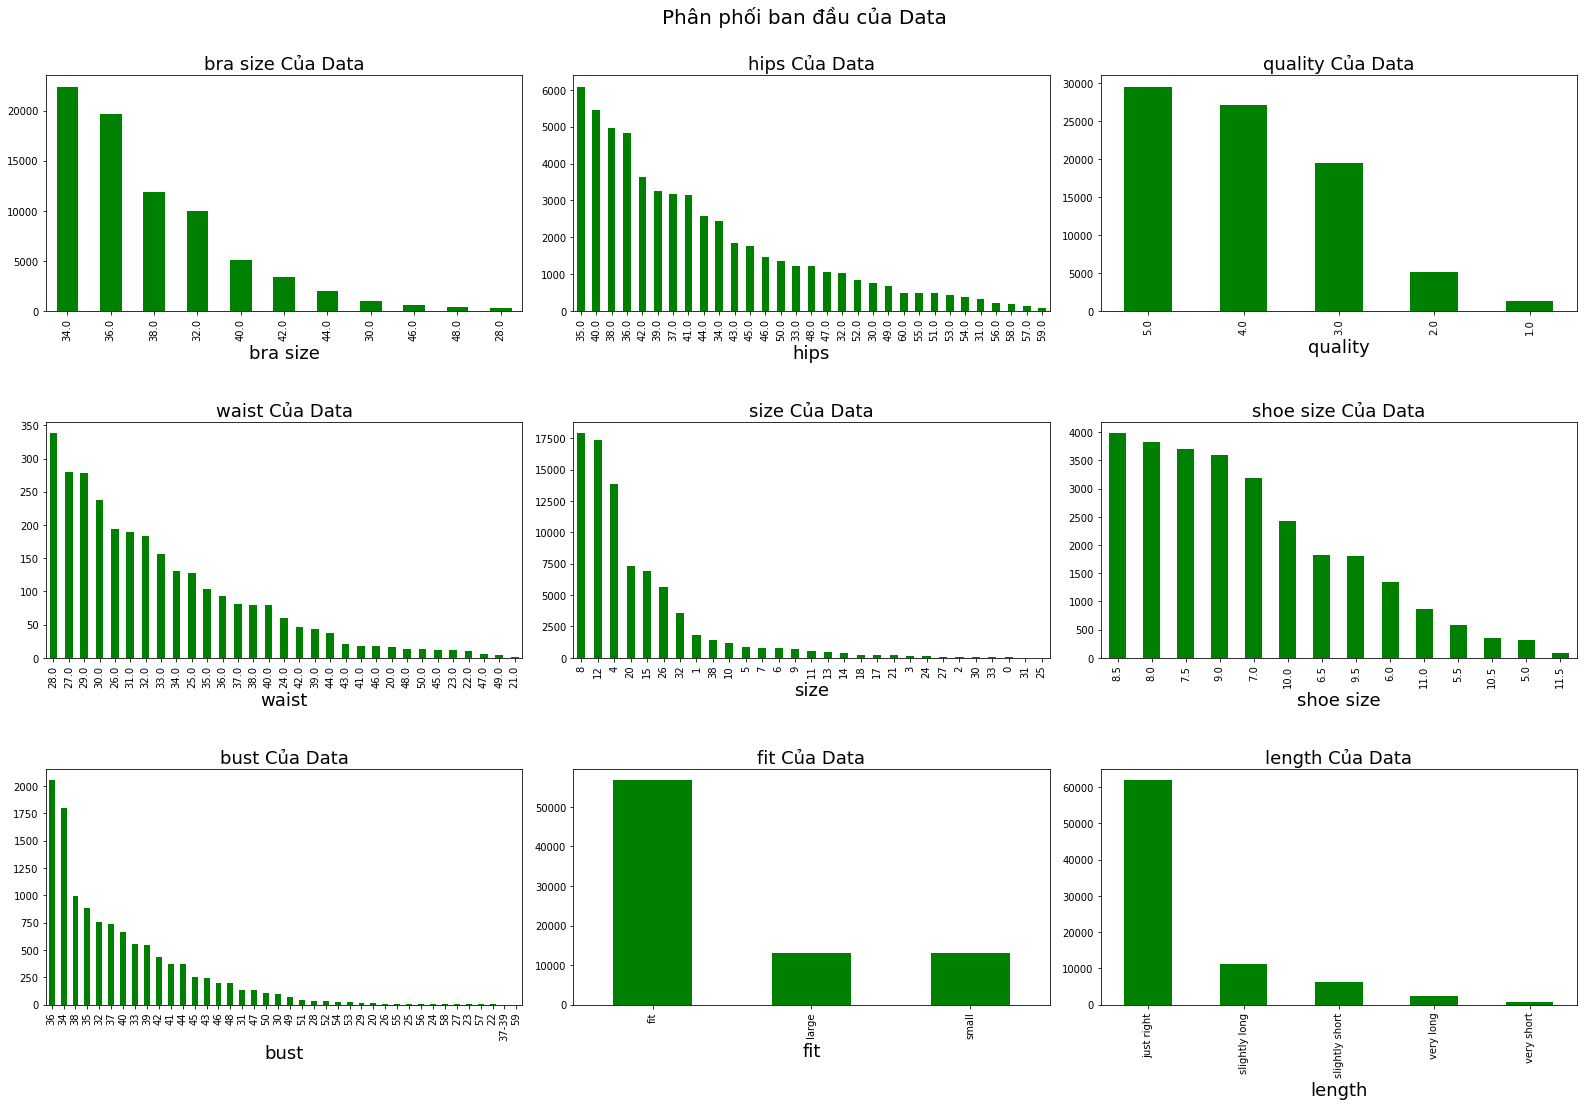

In [280]:
# Làm sạch và xử lý trước dữ liệu
def plot_dist(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind = 'bar', facecolor = 'g', ax = ax)
    ax.set_xlabel('{}'.format(col), fontsize = 18)
    ax.set_title("{} Của Data".format(col), fontsize = 18)
    return ax

fig, ax = plt.subplots(3,3, figsize =(22,15))
fig.tight_layout(h_pad=9,w_pad=2,rect=[0,0.03,1,0.93])
col = ['bra size','hips','quality','waist','size','shoe size','bust','fit','length']
k = 0
for i in range(3):
    for j in range(3):
        plot_dist(col[k],ax[i][j])
        k = k+1
    plt.suptitle("Phân phối ban đầu của Data", fontsize = 20)

In [281]:
df['bra size'][df['bra size'].notnull()].value_counts()

34.0    22412
36.0    19624
38.0    11923
32.0    10026
40.0     5115
42.0     3373
44.0     2014
30.0     1052
46.0      596
48.0      379
28.0      258
Name: bra size, dtype: int64

In [282]:
print(df['bust'].dtype)
df.loc[df['bust'] == '37-39']

object


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,NaN,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr..."


In [283]:
df['bra size'] = df['bra size'].fillna('Unknown') # Những giá trị nào là Nan thì sẽ đẻ là Unknown
df['bra size'] = df['bra size'].astype('category').cat.as_ordered() # Chuyển sang dtyoe category
# Trong visualize của bust có đoạn 37-39 ta áp dụng dùng mean để sữa lại
df.at[37313,'bust'] = '38'
df['bust'] = df['bust'].fillna(0).astype(int) # giá trị Nan mặc định là bằng 0
df['category'] = df['category'].astype('category')

In [284]:
df[df['cup size'].isnull()].sample(5)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
52652,550103,NaN,20,4.0,NaN,NaN,Unknown,tops,0,5ft 8in,bcool6348,just right,fit,87268,NaN,NaN,I am going through menopa,"I am going through menopause and need nice, li..."
50243,539980,NaN,8,4.0,NaN,NaN,Unknown,tops,0,5ft 6in,naama.tayer,just right,fit,53685,NaN,NaN,"Very useful, great color","Very useful, great color"
66316,693560,NaN,12,4.0,NaN,NaN,Unknown,bottoms,0,5ft 7in,Kelly,just right,fit,62551,NaN,NaN,I love this skirt. SO muc,"I love this skirt. SO much so, that the elasti..."
11533,165525,NaN,8,3.0,NaN,37.0,34.0,dresses,0,5ft 7in,Lexi,just right,fit,279469,8.5,NaN,The mustard color is a bi,The mustard color is a bit bright but this is ...
46117,492279,NaN,8,4.0,NaN,NaN,Unknown,tops,0,5ft 8in,ahmango,slightly short,fit,156423,NaN,NaN,"Cute top, I like the slee","Cute top, I like the sleeves and fit, but I am..."


In [285]:
df['cup size'].fillna('Unknown', inplace = True)
df['cup size'] = df['cup size'].astype('category').cat.as_ordered()
df.fit = df.fit.astype('category')

In [286]:
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,0,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,0,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,0,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [287]:
# xỬ lý cột height
def get_cms(x):
    if type(x) == type(1.0):
        return
    try:
        return(int(x[0]*30.48) + (int(x[4:2]))*2.54)
    except:
        return (int(x[0])*30.48)
df.height = df.height.apply(get_cms)

In [288]:
df.height

0        152.40
1        152.40
2        152.40
3           NaN
4        152.40
          ...  
82785    152.40
82786    152.40
82787    152.40
82788    152.40
82789    182.88
Name: height, Length: 82790, dtype: float64

In [289]:
df[df.height.isnull()].head(20)

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
3,123373,NaN,21,5.0,dd/e,NaN,Unknown,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
17,123373,NaN,15,4.0,dddd/g,NaN,36.0,new,0,NaN,Megan,just right,large,128353,NaN,NaN,NaN,NaN
43,123373,NaN,15,5.0,dd/e,NaN,36.0,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,NaN,NaN
73,124124,NaN,20,4.0,c,NaN,38.0,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,NaN,NaN
131,124124,NaN,12,3.0,c,NaN,36.0,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,NaN,NaN
213,124124,NaN,20,4.0,d,NaN,40.0,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,NaN,NaN
382,125442,NaN,5,5.0,b,NaN,34.0,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,NaN,NaN
423,125442,NaN,7,5.0,c,NaN,34.0,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,NaN,NaN
456,125442,NaN,7,5.0,b,NaN,38.0,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,NaN,NaN
475,125442,NaN,7,5.0,dd/e,36.0,30.0,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,NaN,NaN


* Việc lọc này cho chúng ta những quan sát thú vị ở đây:
    * Một số khách hàng đã cung cấp dữ liệu bra_size, cup_size, trong khi tất cả các số đo khác đều trống - có thể mua lần đầu tại Modcloth cho đồ lót!
    * Một số khách hàng đã cho shoe_size và tất cả các số đo khác đều trống - bạn có thể mua giày lần đầu tại Modcloth để mua giày! Nó dẫn chúng tôi đến việc nói rằng có một số người mua lần đầu trong tập dữ liệu, cũng được các tác giả của dữ liệu nói về trong [1] - về sự thưa thớt của dữ liệu do 1 giao dịch! Ngoài ra, vì chúng tôi không có dữ liệu về chiều cao của những khách hàng này, nên việc giữ nguyên các giá trị còn thiếu trong cột là hợp lý và có thể xóa các hàng này để lập mô hình thống kê trong tương lai. Chúng tôi đã loại bỏ các hàng tương ứng.

* Dựa trên những quan sát của chúng tôi ở trên, việc xác định các giao dịch thuộc về người dùng lần đầu là rất hợp lý. Chúng tôi sử dụng logic sau để xác định các trxns như vậy:
    - Nếu bra size/cup size có value mà các cột height,hips,shoe size,shoe width and waist mang giá trị Nan thì ta biết rằng đây là khách hàng mua nội y lần đầu ở cữa hàng
    - Nếu shoe size/shoe width có value mà các cột bra size,cup size,height, hips and waist mang giá trị Nan thì ta biết rằng đây là khách hàng mua giày lần đầu ở cữa hàng
    - Nếu hips/waist có value mà các cột bra size,cup size,height, shoe size,shoe width mang giá trị Nan thì ta biết rằng đây là khách hàng mua Váy hoặc áo lần đầu tiên.

In [290]:
print("Khách Hàng Mua Nội Y Lần Đầu Tiên: ")
print(df[( (df['bra size'] !=  'Unknown') | (df['cup size'] != 'Unknown') & (df.height.isnull()) & (df['hips'].isnull()) &
 (df['shoe size'].isnull()) & (df['shoe width'].isnull()) & (df['waist'].isnull()))].head(3))


Khách Hàng Mua Nội Y Lần Đầu Tiên: 
   item_id  waist  size  quality cup size  hips bra size category  bust  \
0   123373   29.0     7      5.0        d  38.0     34.0      new    36   
1   123373   31.0    13      3.0        b  30.0     36.0      new     0   
2   123373   30.0     7      2.0        b   NaN     32.0      new     0   

   height         user_name         length    fit  user_id  shoe size  \
0   152.4             Emily     just right  small   991571        NaN   
1   152.4  sydneybraden2001     just right  small   587883        NaN   
2   152.4             Ugggh  slightly long  small   395665        9.0   

  shoe width review_summary review_text  
0        NaN            NaN         NaN  
1        NaN            NaN         NaN  
2        NaN            NaN         NaN  


In [291]:
print("Khách Hàng Mua Giay Lần Đầu Tiên: ")
print(df[(df['bra size'] == 'Unknown') & (df['cup size'] == 'Unknown') & (df.height.isnull()) & (df.hips.isnull()) &
     (df['shoe size'].notnull()) | (df['shoe width'].notnull()) & (df.waist.isnull())].head(3))

Khách Hàng Mua Giay Lần Đầu Tiên: 
    item_id  waist  size  quality cup size  hips bra size category  bust  \
8    123373    NaN    30      4.0        d  50.0     42.0      new     0   
21   123373    NaN     5      5.0        b   NaN     34.0      new     0   
23   123373    NaN     5      5.0        c  32.0     34.0      new    34   

    height       user_name      length    fit  user_id  shoe size shoe width  \
8    152.4  francescaviola  just right  small   279568       11.0       wide   
21   152.4         dputvin  just right  large     4905        7.0    average   
23   152.4        Michelle  just right  small   990166        7.0    average   

   review_summary review_text  
8             NaN         NaN  
21            NaN         NaN  
23            NaN         NaN  


In [292]:
print("Khách hàng Mua Váy/Áo Lần Đầu Tiên: ")
print(df[(df['bra size'] == 'Unknown') & (df['cup size'] == 'Unknown') & (df.height.isnull()) & ((df.hips.notnull()) | (df.waist.notnull())) &
     (df['shoe size'].isnull()) & (df['shoe width'].isnull())].head(3))

Khách hàng Mua Váy/Áo Lần Đầu Tiên: 
      item_id  waist  size  quality cup size  hips bra size category  bust  \
2364   131020    NaN    11      5.0  Unknown  39.0  Unknown      new     0   
3568   143287    NaN    12      5.0  Unknown  41.0  Unknown      new    38   
8714   161514    NaN    26      5.0  Unknown  58.0  Unknown  dresses     0   

      height      user_name      length  fit  user_id  shoe size shoe width  \
2364     NaN  aislinnalysse  just right  fit   259712        NaN        NaN   
3568     NaN       a.stahle  just right  fit   300915        NaN        NaN   
8714     NaN  foxlindseyfox  just right  fit   817544        NaN        NaN   

                review_summary  \
2364                       NaN   
3568                       NaN   
8714  I wore this dress when I   

                                            review_text  
2364                                                NaN  
3568                                                NaN  
8714  I wore this dres

Thêm Cột data first_time_user

In [293]:
lingerie_cond = ((df['bra size'] !=  'Unknown') | (df['cup size'] != 'Unknown') & (df.height.isnull()) & (df['hips'].isnull()) &
 (df['shoe size'].isnull()) & (df['shoe width'].isnull()) & (df['waist'].isnull()))

shoe_cond = ((df['bra size'] == 'Unknown') & (df['cup size'] == 'Unknown') & (df.height.isnull()) & (df.hips.isnull()) &
     (df['shoe size'].notnull()) | (df['shoe width'].notnull()) & (df.waist.isnull()))
     
dress_cond = ((['bra size'] == 'Unknown') & (df['cup size'] == 'Unknown') & (df.height.isnull()) & ((df.hips.notnull()) | (df.waist.notnull())) &
     (df['shoe size'].isnull()) & (df['shoe width'].isnull()))

In [294]:
df['first time user'] = (lingerie_cond | shoe_cond | dress_cond)

In [295]:
print(len(df[lingerie_cond]))
print(len(df[shoe_cond]))
print(len(df[dress_cond]))
print("Column added!")
print("Total transactions by first time users who bought bra, shoes, or a dress: " + str(sum(df['first time user'])))
print("Total first time users: " + str(len(df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))
df.shape

76776
17811
0
Column added!
Total transactions by first time users who bought bra, shoes, or a dress: 77391
Total first time users: 44111


(82790, 19)

In [296]:
df['hips'] = df['hips'].fillna(-1.0)
df['hips'].head(20)

0     38.0
1     30.0
2     -1.0
3     -1.0
4     -1.0
5     41.0
6     -1.0
7     42.0
8     50.0
9     41.0
10    49.0
11    60.0
12    -1.0
13    -1.0
14    36.0
15    50.0
16    44.0
17    -1.0
18    39.0
19    35.0
Name: hips, dtype: float64

In [297]:
bins = [-5,0,31,37,40,44,75]
labels= ['Unknown','XS','S','M','L','XL']
df['hips'] = pd.cut(df['hips'],bins= bins,labels=labels)
df['hips'].head(20)

0           M
1          XS
2     Unknown
3     Unknown
4     Unknown
5           L
6     Unknown
7           L
8          XL
9           L
10         XL
11         XL
12    Unknown
13    Unknown
14          S
15         XL
16          L
17    Unknown
18          M
19          S
Name: hips, dtype: category
Categories (6, object): ['Unknown' < 'XS' < 'S' < 'M' < 'L' < 'XL']

In [298]:
# Xử lý cột lenght
missing_rows = df[df.length.isnull()].index
missing_rows

Int64Index([ 3822,  5792,  8045, 11056, 12747, 16139, 16170, 16194, 18342,
            18395, 18823, 19011, 20503, 20506, 20976, 22488, 40676, 42497,
            45987, 49745, 61121, 61632, 61976, 67862, 69561, 70247, 71829,
            71865, 72770, 74569, 75658, 76892, 76974, 79537, 80933],
           dtype='int64')

In [299]:
df[df['length'].isnull() == True]

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text,first time user
3822,146231,NaN,12,NaN,c,Unknown,36.0,new,36,152.4,ers1113,NaN,fit,100887,9.5,NaN,NaN,NaN,True
5792,151160,NaN,5,5.0,Unknown,Unknown,Unknown,new,0,152.4,Jmast,NaN,fit,103192,NaN,NaN,NaN,NaN,False
8045,155256,31.0,8,4.0,d,L,32.0,new,0,152.4,Shannon,NaN,fit,122732,NaN,NaN,Love it! Beautiful and pe,Love it! Beautiful and perfect for the wedding...,True
11056,165525,NaN,32,NaN,d,Unknown,44.0,dresses,0,152.4,Chris P,NaN,small,676796,NaN,NaN,Too small,"I had high hopes for this dress, unfortunately...",True
12747,169727,45.0,26,4.0,Unknown,XL,Unknown,dresses,0,152.4,deathcaploverooms,NaN,small,23477,NaN,NaN,This was a fiasco. I feel,This was a fiasco. I feel in love with this gr...,False
16139,176429,32.0,20,5.0,Unknown,M,38.0,dresses,44,152.4,ElleBee,NaN,fit,229965,8.5,average,Perfect fit!,I have to echo everything the other reviewer h...,True
16170,180912,NaN,12,NaN,Unknown,Unknown,Unknown,dresses,0,152.4,Jess,NaN,fit,538927,NaN,NaN,This dress is so well mad,"This dress is so well made and so pretty, perf...",False
16194,189315,38.0,15,4.0,dd/e,L,38.0,dresses,0,152.4,calliope8,NaN,small,962845,NaN,NaN,Runs Small,I usually wear an XL/16 but ordered up on this...,True
18342,211670,NaN,8,NaN,c,Unknown,34.0,sale,0,152.4,Audreysf,NaN,small,768541,NaN,NaN,Cute but wayyyy too small,This dress is incredibly cute but I?m on my 2n...,True
18395,219733,NaN,8,4.0,Unknown,Unknown,Unknown,sale,0,152.4,Caitlin,NaN,small,697645,NaN,NaN,"Lovely and fairly well made, just runs small.","I bought this a week ago, and it just arrived....",False


In [300]:
df.drop(missing_rows, axis = 0, inplace=True)

In [301]:
df.quality = df.quality.astype('category').cat.as_ordered()


In [302]:
df['quality'].value_counts()

5.0    29598
4.0    27107
3.0    19521
2.0     5129
1.0     1342
Name: quality, dtype: int64

In [303]:
df['shoe width'].value_counts()

average    13092
wide        3956
narrow      1551
Name: shoe width, dtype: int64

In [304]:
from pandas.api.types import CategoricalDtype
shoe_widths_type = CategoricalDtype(categories=['Unknown','narrow','average','wide'], ordered=True)

df.review_summary = df.review_summary.fillna('Unknown')
df.review_text = df.review_text.fillna('Unkown')
df['shoe size'] = df['shoe size'].fillna('Unknown')
df['shoe size'] = df['shoe size'].astype('category').cat.as_ordered()
df['shoe width'] = df['shoe width'].fillna('Unknown')
df['shoe width'] = df['shoe width'].astype(shoe_widths_type)
# bust: 85,6% missing value và có tương quan cao với bra_size nênLoại bỏ.
df.drop(['waist', 'bust', 'user_name'], axis=1, inplace=True)
missing_rows = df[df.height.isnull()].index
df.drop(missing_rows, axis = 0, inplace=True)

In [305]:
df.head()

,item_id,size,quality,cup size,hips,bra size,category,height,length,fit,user_id,shoe size,shoe width,review_summary,review_text,first time user
0,123373,7,5.0,d,M,34.0,new,152.4,just right,small,991571,Unknown,Unknown,Unknown,Unkown,True
1,123373,13,3.0,b,XS,36.0,new,152.4,just right,small,587883,Unknown,Unknown,Unknown,Unkown,True
2,123373,7,2.0,b,Unknown,32.0,new,152.4,slightly long,small,395665,9.0,Unknown,Unknown,Unkown,True
4,123373,18,5.0,b,Unknown,36.0,new,152.4,slightly long,small,944840,Unknown,Unknown,Unknown,Unkown,True
5,123373,11,5.0,c,L,36.0,new,152.4,just right,small,162012,Unknown,Unknown,Unknown,Unkown,True


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81649 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81649 non-null  int64   
 1   size             81649 non-null  int64   
 2   quality          81594 non-null  category
 3   cup size         81649 non-null  category
 4   hips             81649 non-null  category
 5   bra size         81649 non-null  category
 6   category         81649 non-null  category
 7   height           81649 non-null  float64 
 8   length           81649 non-null  object  
 9   fit              81649 non-null  category
 10  user_id          81649 non-null  int64   
 11  shoe size        81649 non-null  category
 12  shoe width       81649 non-null  category
 13  review_summary   81649 non-null  object  
 14  review_text      81649 non-null  object  
 15  first time user  81649 non-null  bool    
dtypes: bool(1), category(8), float64(1), int

In [309]:
missing_rows = df[df.quality.isnull()].index
df.drop(missing_rows, axis = 0, inplace=True)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81594 entries, 0 to 82789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   item_id          81594 non-null  int64   
 1   size             81594 non-null  int64   
 2   quality          81594 non-null  category
 3   cup size         81594 non-null  category
 4   hips             81594 non-null  category
 5   bra size         81594 non-null  category
 6   category         81594 non-null  category
 7   height           81594 non-null  float64 
 8   length           81594 non-null  object  
 9   fit              81594 non-null  category
 10  user_id          81594 non-null  int64   
 11  shoe size        81594 non-null  category
 12  shoe width       81594 non-null  category
 13  review_summary   81594 non-null  object  
 14  review_text      81594 non-null  object  
 15  first time user  81594 non-null  bool    
dtypes: bool(1), category(8), float64(1), int

## EDA visualizations

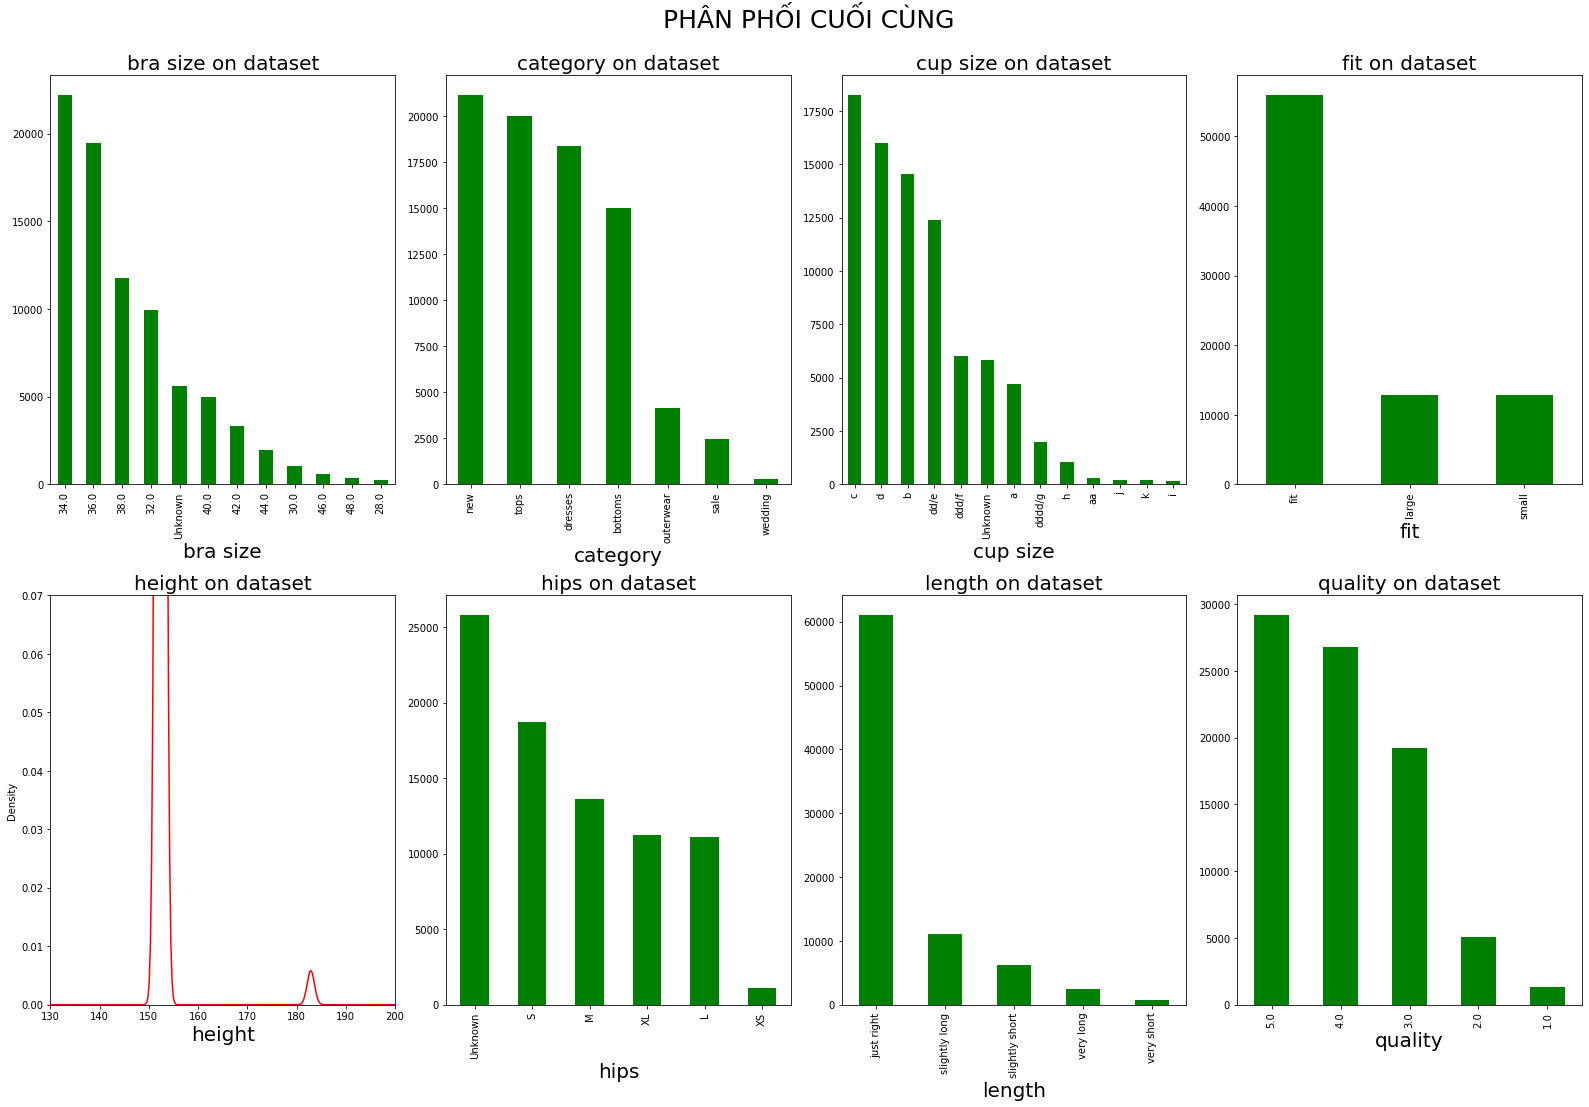

In [316]:
def plot_dist_new(col, ax):
    if col != 'height':
        df[col].value_counts().plot(kind='bar', facecolor='g',ax = ax)
    else:
        df[col].plot(kind = 'density', ax = ax, bw_method = 0.15, color  = 'r')
        ax.set_xlim(130,200)
        ax.set_ylim(0,0.07)
    ax.set_xlabel("{}".format(col), fontsize = 20)
    ax.set_title("{} on dataset".format(col),fontsize = 20)

fig,ax = plt.subplots(2,4, figsize = (22,15))
fig.tight_layout(h_pad = 9, w_pad=2, rect=[0,0.03,1,0.93])
cols = ['bra size','category','cup size','fit','height','hips','length','quality']
k = 0
for i in range(2):
    for j in range(4):
        plot_dist_new(cols[k],ax[i][j])
        k += 1
    plt.suptitle("PHÂN PHỐI CUỐI CÙNG", fontsize =25)